A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


## Ejercicio 1

### Carga los datos originales

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)

In [2]:
from sklearn.decomposition import PCA

pca2 = PCA(2)
pca3 = PCA(3)

X_pca2 = pca2.fit_transform(X)
X_pca3 = pca3.fit_transform(X)

print("PCA 2:", pca2.explained_variance_ratio_)
print("PCA 3:", pca3.explained_variance_ratio_)

PCA 2: [0.92461872 0.05306648]
PCA 3: [0.92461872 0.05306648 0.01710261]


### Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.

In [3]:
import pandas as pd

pd.DataFrame(X_pca2)[0]

0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: 0, Length: 150, dtype: float64

In [4]:
# PCA(2)
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# PCA(3)
X_train_pca3, X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split(X_pca3,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
# Ambos y_test deberían ser iguales. Breve comprobación
pd.DataFrame([y_test_pca2, y_test_pca3]).T

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


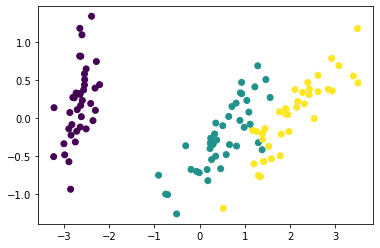

In [6]:
# Veamos la transformación de PCA2
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(x = pd.DataFrame(X_train_pca2)[0], y = pd.DataFrame(X_train_pca2)[1], c = y_train_pca2)

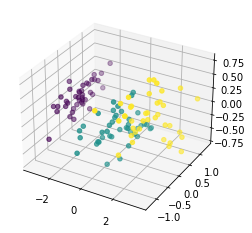

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pd.DataFrame(X_train_pca3)[0], pd.DataFrame(X_train_pca3)[1], pd.DataFrame(X_train_pca3)[2], c=y_train_pca3)
#plt.show()

In [8]:
# Tenemos 3 clusters, como se puede comprobar en ambas representaciones

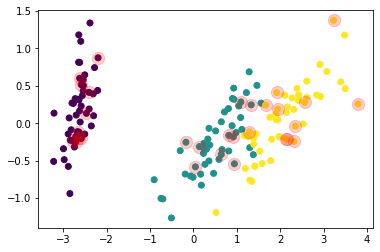

In [9]:
# Quiero ver donde están los test points respecto de todo el sample (para PCA2)

plt.scatter(x = pd.DataFrame(X_pca2)[0], y = pd.DataFrame(X_pca2)[1], c = y)
plt.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], s = 150, c = "r", alpha = .2)

In [10]:
from sklearn.cluster import KMeans

In [11]:
#### PCA(2)

# Model
kmeans_pca2 = KMeans(n_clusters = 3, random_state = 42)

# Training
kmeans_pca2.fit(X_train_pca2)

# Prediction
predict_pca2 = kmeans_pca2.predict(X_test_pca2)

print("prediction:", predict_pca2)
print("inertia:", kmeans_pca2.inertia_)
print("score:", kmeans_pca2.score(X_pca2))

prediction: [2 1 0 2 2 1 2 0 2 2 0 1 1 1 1 2 0 2 2 0 1 2 1 0 0 0 0 0 1 1]
inertia: 52.473173474190645
score: -63.92274186090267


In [12]:
#### PCA(3)

# Model
kmeans_pca3 = KMeans(n_clusters = 3, random_state = 42)

# Training
kmeans_pca3.fit(X_train_pca3)

# Prediction
predict_pca3 = kmeans_pca3.predict(X_test_pca3)

print("prediction:", predict_pca3)
print("inertia:", kmeans_pca3.inertia_)
print("score:", kmeans_pca3.score(X_pca3))

prediction: [2 0 1 2 2 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 0 2 0 1 1 1 1 1 0 0]
inertia: 62.26083633790898
score: -75.46533743239092


### Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).

In [13]:
# REVISAR

df = pd.DataFrame([y_test_pca2, predict_pca2, predict_pca3], index = ["y_test", "predict_pca2", "predict_pca3"]).T

df.head()

,y_test,predict_pca2,predict_pca3
0,1,2,2
1,0,1,0
2,2,0,1
3,1,2,2
4,1,2,2


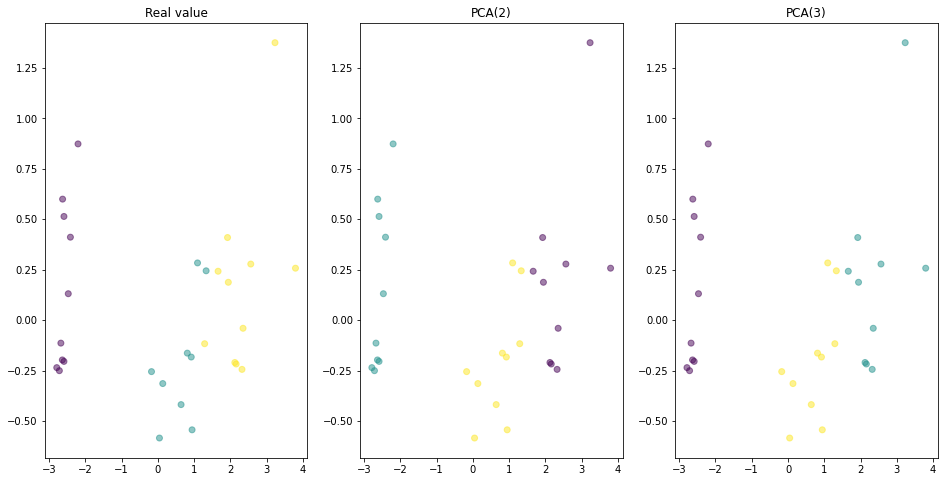

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 8))

ax1.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["y_test"], alpha = .5)
ax1.set_title("Real value")
ax2.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["predict_pca2"], alpha = .5)
ax2.set_title("PCA(2)")
ax3.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["predict_pca3"], alpha = .5)
ax3.set_title("PCA(3)")

plt.show()

### ¿Es mejor PCA(2) o PCA(3)?

In [15]:
# Para ver cuál es mejor, primero tiro del score

print("PCA 2 score:", kmeans_pca2.score(X_test_pca2))
print("PCA 3 score:", kmeans_pca3.score(X_test_pca3))

PCA 2 score: -11.449568386712006
PCA 3 score: -13.20450109448193


In [16]:
# Vemos que con PCA3 tenemos una mejor score. Sin embargo, por el gráfico que pintamos antes, pereciera que PCA2 acierta más, a pesar de tener un grupo menos

# Vamos a comprobar esto viendo cuantos aciertos (sobre el test) tiene cada modelo

df["predict_pca2_correct"] = df.y_test == df.predict_pca2
df["predict_pca3_correct"] = df.y_test == df.predict_pca3

df.head()

,y_test,predict_pca2,predict_pca3,predict_pca2_correct,predict_pca3_correct
0,1,2,2,False,False
1,0,1,0,False,True
2,2,0,1,False,False
3,1,2,2,False,False
4,1,2,2,False,False


In [17]:
# Aquí podemos ver porcentualmente cuanto acertó cada modelo en sus prediciones

df[["predict_pca2_correct", "predict_pca3_correct"]].sum() / len(df)

predict_pca2_correct    0.033333
predict_pca3_correct    0.366667
dtype: float64

Se puede ver que ambos modelos son capaces de separar bien los grupos, pero luego no etiquetan tan bien. En este caso PCA3 lo hace bastante mejor que PCA2, como era de esperar al tener más información.

## Ejercicio 2

### T-SNE

In [19]:
from sklearn.manifold import TSNE

tsne2 = TSNE(2)
tsne3 = TSNE(3)

X_tsne2 = tsne2.fit_transform(X)
X_tsne3 = tsne3.fit_transform(X)

# TSNE(2)
X_train_tsne2, X_test_tsne2, y_train_tsne2, y_test_tsne2 = train_test_split(X_tsne2,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# TSNE(3)
X_train_tsne3, X_test_tsne3, y_train_tsne3, y_test_tsne3 = train_test_split(X_tsne3,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# check
pd.DataFrame([y_test_tsne2, y_test_tsne3]).T.head()

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


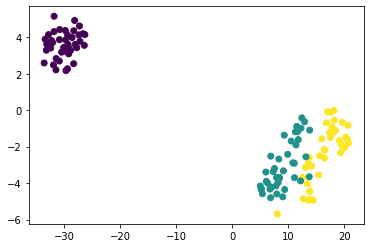

In [20]:
plt.scatter(x = pd.DataFrame(X_train_tsne2)[0], y = pd.DataFrame(X_train_tsne2)[1], c = y_train_tsne2)

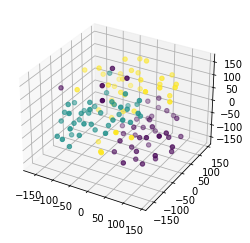

In [21]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pd.DataFrame(X_train_tsne3)[0], pd.DataFrame(X_train_tsne3)[1], pd.DataFrame(X_train_tsne3)[2], c=y_train_tsne3)
#plt.show()

In [51]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

#### TSNE(2)
db_tsne2 = DBSCAN(eps = 1.3, min_samples = 5)

# Training
db_tsne2.fit(X_tsne2)

# Prediction
labels_tsne2 = db_tsne2.labels_

# Silhouette score
print("Silhouette score:", metrics.silhouette_score(X_tsne2, labels_tsne2))

Silhouette score: 0.6914444


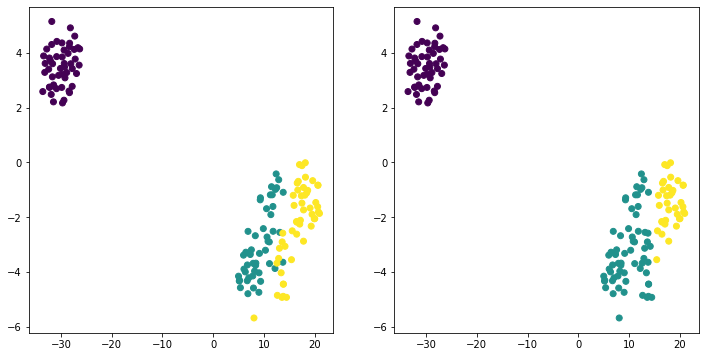

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.scatter(x = pd.DataFrame(X_tsne2)[0], y = pd.DataFrame(X_tsne2)[1], c = y)
ax2.scatter(x = pd.DataFrame(X_tsne2)[0], y = pd.DataFrame(X_tsne2)[1], c = labels_tsne2)

In [152]:
#### TSNE(3)
db_tsne3 = DBSCAN(eps = 50, min_samples = 3)

# Training
db_tsne3.fit(X_tsne3)

# Prediction
labels_tsne3 = db_tsne3.labels_

# Silhouette score
print("Silhouette score:", metrics.silhouette_score(X_tsne3, labels_tsne3))

labels_tsne3

Silhouette score: 0.17634915


array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1])

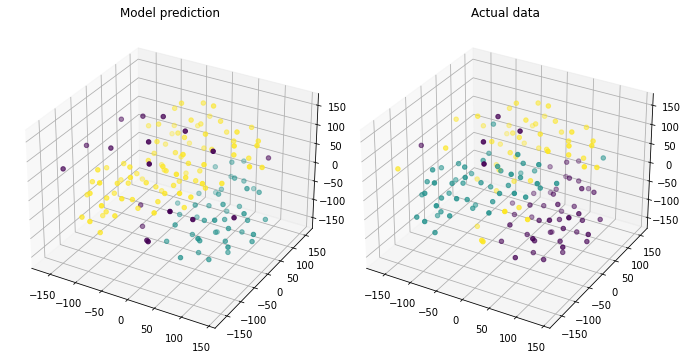

In [153]:
fig = plt.figure(figsize = (22, 6))
#ax = Axes3D(fig)
ax1 = fig.add_subplot(111, projection='3d')
ax2 = fig.add_subplot(121, projection='3d')
ax1.scatter(pd.DataFrame(X_tsne3)[0], pd.DataFrame(X_tsne3)[1], pd.DataFrame(X_tsne3)[2], c=y)
ax1.set_title("Actual data")
ax2.scatter(pd.DataFrame(X_tsne3)[0], pd.DataFrame(X_tsne3)[1], pd.DataFrame(X_tsne3)[2], c=labels_tsne3)
ax2.set_title("Model prediction")
plt.show()

Parece que con TSNE y DBSCAN, la mejor combinación es transformando a 2 dimensiones y posteriormente usando 5 vecinos y utilizando una distancia de 1.3.